In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from tqdm import tqdm
from math import sqrt
from scipy import stats
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

<Axes: >

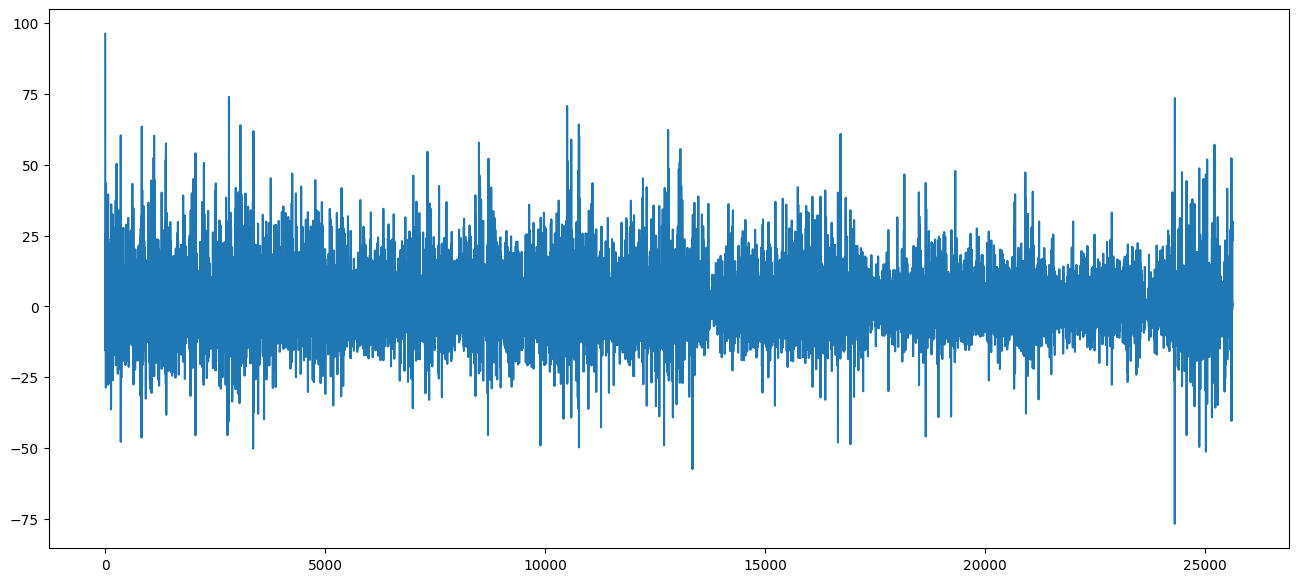

In [3]:
network_analytics = pd.read_csv('./data/Network_Analytics.csv')
series = pd.Series(network_analytics['OutboundUtilzation (%)'])
series.diff().fillna(series).plot(figsize=(16, 7))

0          NaN
1          NaN
2    97.548833
3    98.143633
4    98.281367
5    98.785433
6    95.430433
7    86.347667
8    74.856733
9    75.532667
Name: OutboundUtilzation (%), dtype: float64


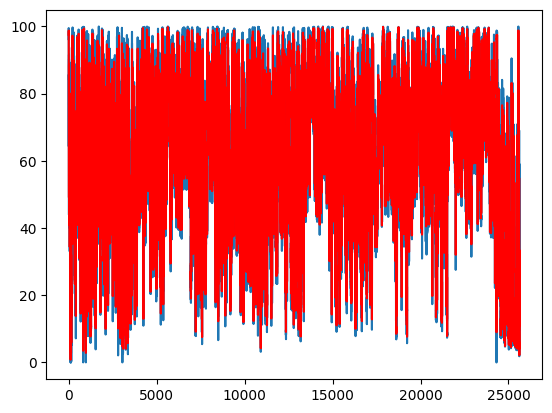

In [7]:
# Tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
plt.show()

In [8]:
df = pd.DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = pd.concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't-1', 't+1']
print(dataframe.head(10))

        mean      t-1      t+1
0        NaN      NaN  96.2442
1        NaN  96.2442  99.1131
2        NaN  99.1131  97.2892
3        NaN  97.2892  98.0286
4  97.548833  98.0286  99.5263
5  98.143633  99.5263  98.8014
6  98.281367  98.8014  87.9636
7  98.785433  87.9636  72.2780
8  95.430433  72.2780  64.3286
9  86.347667  64.3286  89.9914


predicted=97.548833, expected=98.028600
predicted=53.767600, expected=55.193700
predicted=43.365967, expected=41.529200
predicted=33.838900, expected=24.475500
predicted=43.929967, expected=39.972800
predicted=49.820733, expected=55.096300
predicted=68.124133, expected=68.880100
predicted=42.269200, expected=48.589400
predicted=75.172467, expected=69.931400
predicted=41.420233, expected=54.804200
predicted=69.226200, expected=52.722300
predicted=53.553367, expected=46.751200
predicted=66.788867, expected=60.867300
predicted=63.582933, expected=95.379800
predicted=67.034133, expected=58.311300
predicted=99.285600, expected=94.499300
predicted=47.942100, expected=37.027000
predicted=77.932133, expected=66.229900
predicted=54.569500, expected=48.973900
predicted=85.343000, expected=91.740900
predicted=69.737433, expected=68.382100
predicted=76.794667, expected=82.839900
predicted=32.045567, expected=41.131700
predicted=71.331933, expected=68.731500
predicted=51.961433, expected=44.241200


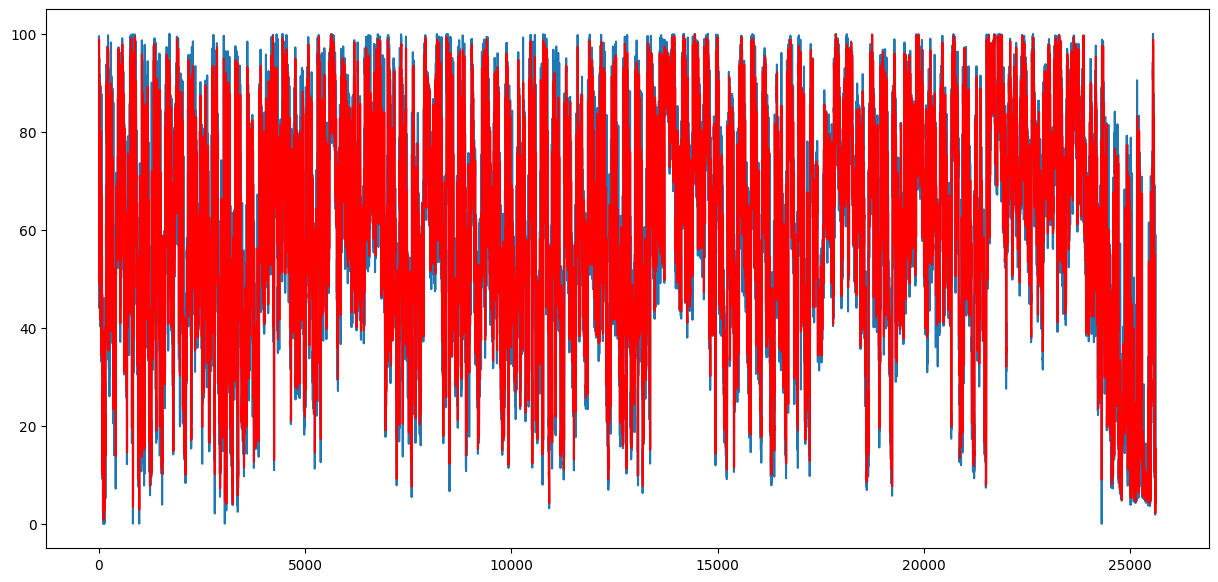

In [14]:
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
    length = len(history)
    yhat = np.mean([history[i] for i in range(length-window,length)])
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    if t % 1000 == 0:
        print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot
plt.figure(figsize=(15,7))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

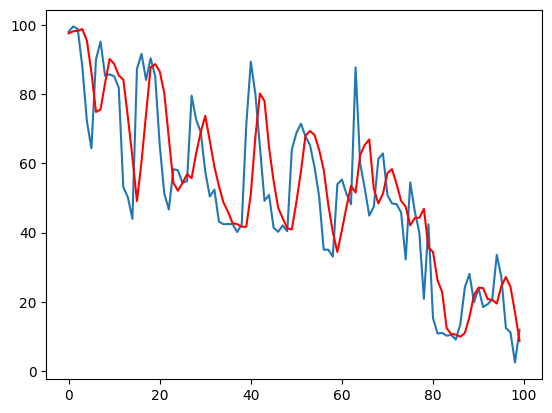

In [15]:
# zoom plot
plt.plot(test[0:100])
plt.plot(predictions[0:100], color='red')
plt.show()